In [12]:
import keen
from keen.client import KeenClient
import arrow

KEEN_PROJECT_ID = "572dfdae3831443195b2f30c"
KEEN_READ_KEY = "5de7f166da2e36f6c8617347a7a729cfda6d5413db8d88d7f696b61ddaa4fe1e5cdb7d019de9bb0ac846d91e83cdac01e973585d0fba43fadf92f06a695558b890665da824a0cf6a946ac09f5746c9102d228a1165323fdd0c52c92b80e78eca"

client = KeenClient(
    project_id=KEEN_PROJECT_ID,
    read_key=KEEN_READ_KEY
)

earthquakes_by_day = client.count_unique("earthquakes",
    timeframe={
        "start": arrow.get(2016, 9, 20).format(),
        "end": arrow.get(2016, 10, 20).format()
    },
    target_property="id",
    interval="daily"
)

# print(earthquakes_by_day)
# This is what all the data means
# https://earthquake.usgs.gov/data/comcat/data-eventterms.php

In [2]:
# Populate y axis values - get number of earthquakes by day
earthquake_counts = list(map(lambda x: x["value"], earthquakes_by_day))

# Populate x axis values - get dates
earthquake_dates = list(
    map(lambda x: arrow.get(x["timeframe"]["start"]).format("M-DD"), earthquakes_by_day)
)

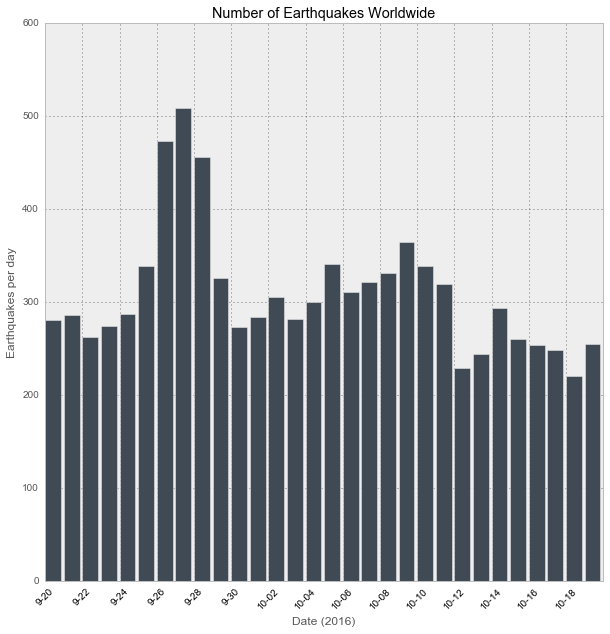

In [8]:
%matplotlib inline
# Let's create a bar chart!
# http://matplotlib.org/examples/api/barchart_demo.html

import numpy as np
import matplotlib.pyplot as plt

x_locations = np.arange(len(earthquakes_by_day))
bar_width = 0.85
bar_color = (64/255.0, 74/255.0, 84/255.0)

# Setting size of the plot
fig = plt.figure(figsize=(10, 10))

# Creating a bar chart
plt.bar(x_locations, earthquake_counts, bar_width, color=bar_color)

# Plot x axis values, rotate, plot _every other_ date for cleaner plot
plt.xticks(x_locations[::2], earthquake_dates[::2], rotation=45)

# Let's add some text labels to make this easier to read:

# Get the axis object
ax = fig.add_subplot(111)

ax.set_title("Number of Earthquakes Worldwide")
ax.set_ylabel("Earthquakes per day")
ax.set_xlabel("Date (2016)")

In [9]:
earthquake_extraction = client.extraction("earthquakes",
    timeframe={
        "start": arrow.get(2016, 10, 1).format(),
        "end": arrow.get(2016, 11, 1).format()
    },
    filters=[
        {
            "property_name": "keen.location.coordinates",
            "operator": "within",
            "property_value": {
                "coordinates": [ -122.42005, 37.77479 ],
                "max_distance_miles": 200
            }
        }
    ]
)

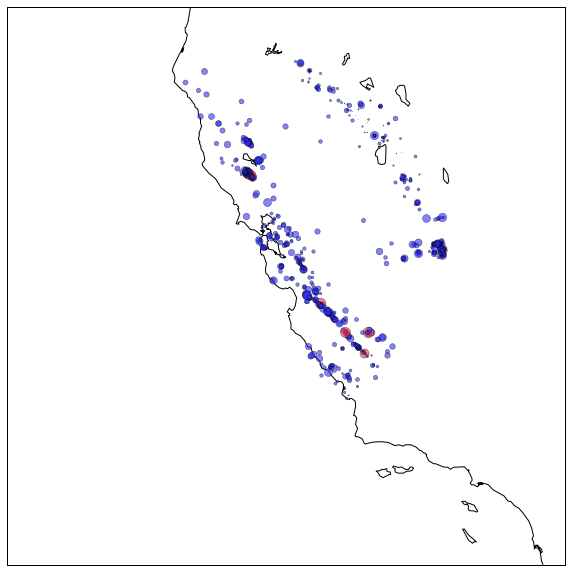

In [10]:
## Locations
from mpl_toolkits.basemap import Basemap
plt.figure(figsize=(15, 10))

world_map = Basemap(
            resolution='i',projection='cass',\
            #lat_1=36.,lat_2=38,
            lon_0=-122,lat_0=37,\
            width=1000000, height=1000000,
            urcrnrlon=-134.25, urcrnrlat=44.75)

world_map.drawcoastlines()
world_map.drawmapboundary(fill_color="white")

for earthquake in earthquake_extraction:
    coords = earthquake["keen"]["location"]["coordinates"]
    x, y = world_map(coords[0], coords[1])
    color = "#3030ff" if earthquake["mag"] < 3.0 else "#ff3030"
    world_map.plot(x, y, "o", color=color, markersize=earthquake["mag"]*3, alpha=0.6)
    
plt.show()

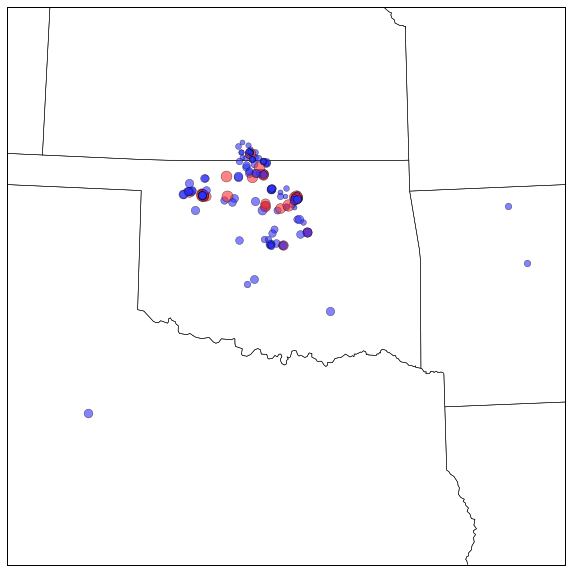

In [11]:
oklahoma_earthquakes = client.extraction("earthquakes",
    timeframe={
        "start": arrow.get(2016, 10, 1).format(),
        "end": arrow.get(2016, 11, 1).format()
    },
    filters=[
        {
            "property_name": "keen.location.coordinates",
            "operator": "within",
            "property_value": {
                "coordinates": [ -97.0929, 35 ],
                "max_distance_miles": 300
            }
        }
    ]
)

from mpl_toolkits.basemap import Basemap
plt.figure(figsize=(15, 10))

world_map = Basemap(
            resolution='i',projection='cass',\
            #lat_1=36.,lat_2=38,
            lon_0=-97.0929,lat_0=35,\
            width=1000000, height=1000000,
            urcrnrlon=-98.25, urcrnrlat=37.75)

world_map.drawstates()
world_map.drawmapboundary(fill_color="white")

for earthquake in oklahoma_earthquakes:
    coords = earthquake["keen"]["location"]["coordinates"]
    x, y = world_map(coords[0], coords[1])
    color = "#3030ff" if earthquake["mag"] <= 3.0 else "#ff3030"
    world_map.plot(x, y, "o", color=color, markersize=earthquake["mag"]*3, alpha=0.6)
    
plt.show()